# Ultimate DateTime

** aqui é apenas análise do tipo 'datetime'.

Se você for trabalhar com `time-series` o correto é ter eses `date-time` como ´indice do dataframe.

Este notembook nao trabalha com time-series, apenas relaciona ao que pode fazer com attr date-time se encontrar em seus problemas que nâo são de Ttime-series

## Links

+ [X] https://www.kaggle.com/code/nextbigwhat/feature-engineering-of-datetime-variables/notebook
+ [X] https://www.kaggle.com/code/alexisbcook/parsing-dates/tutorial


# Import Data

In [46]:
import pandas as pd
# pd.set_option('max_columns', None)

import numpy as np
pd.set_option('display.max_columns', 1000)
import seaborn as sns
# set seed for reproducibility
np.random.seed(0)

In [7]:
df = pd.read_csv("./datasets/loan.csv")
display(df.head(1))
df.info()

,customer_id,disbursed_amount,interest,market,employment,time_employed,householder,income,date_issued,target,loan_purpose,number_open_accounts,date_last_payment,number_credit_lines_12
0,0,23201.5,15.484,C,Teacher,<=5 years,RENT,84600.0,2013-06-11,0,Debt consolidation,4.0,2016-01-14,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   customer_id             10000 non-null  int64  
 1   disbursed_amount        10000 non-null  float64
 2   interest                10000 non-null  float64
 3   market                  10000 non-null  object 
 4   employment              9389 non-null   object 
 5   time_employed           9471 non-null   object 
 6   householder             10000 non-null  object 
 7   income                  10000 non-null  float64
 8   date_issued             10000 non-null  object 
 9   target                  10000 non-null  int64  
 10  loan_purpose            10000 non-null  object 
 11  number_open_accounts    10000 non-null  float64
 12  date_last_payment       10000 non-null  object 
 13  number_credit_lines_12  238 non-null    float64
dtypes: float64(5), int64(2), object(7)
memo

# Snippets

# Convert String to Date

Quando você não passa `format`, consisdera como `infer_datetime_format=True`
````
1/17/07 has the format "%m/%d/%y"
17-1-2007 has the format "%d-%m-%Y"

landslides['date_parsed'] = pd.to_datetime(landslides['date'], format="%m/%d/%y")

````

In [16]:
df['date_issued'] = pd.to_datetime(df['date_issued'])
df['date_last_payment'] = pd.to_datetime(df['date_last_payment'])
display(df.head(1))
display(df['date_issued'].head(1))

,customer_id,disbursed_amount,interest,market,employment,time_employed,householder,income,date_issued,target,loan_purpose,number_open_accounts,date_last_payment,number_credit_lines_12,date_issued:year,date_issued:month,date_issued:day,date_issued:day_of_week,date_issued:day_of_year,date_issued:hour,date_issued:day_part
0,0,23201.5,15.484,C,Teacher,<=5 years,RENT,84600.0,2013-06-11,0,Debt consolidation,4.0,2016-01-14,NaN,2013,6,11,1,162,0,None


0   2013-06-11
Name: date_issued, dtype: datetime64[ns]

Outro caso

In [13]:
from datetime import datetime
date_string = '2021-12-31 15:37'
datetime = datetime.strptime(date_string, '%Y-%m-%d %H:%M')
print(datetime)
# Returns: 2021-12-31 15:37:00

2021-12-31 15:37:00


In [34]:
# Obter hoje
datetime.today()

datetime.datetime(2022, 4, 15, 17, 37, 22, 886257)

# Access Data Proprietis

https://datagy.io/pandas-extract-date-from-datetime/

https://datagy.io/python-string-to-date/

**quarter significa trimestre**

| Pandas dt accessor | Used to access                                               |
| :----------------- | :----------------------------------------------------------- |
| `.week`            | The week number                                              |
| `.year`            | The year value, returned as an integer                       |
| `.date`            | The date without time values                                 |
| `.day`             | The day of the month, returned as a value from 1 through 31  |
| `.month`           | The month of the year, returned as a value from 1 through 12 |
| `.weekday`         | The day of the week returned as a value where Monday=0 and Sunday=6 |
| `.day_name()`      | The name of the weekday returned as a string                 |
|.month| will return the month as a number from 1 through 12
|.month_name() | will return the locale’s named month, allowing you to pass in a different locale
|.month_name().str[:3] | will return the abbreviated version of the month’s name
| .weekday | returns the weekday number starting at 0 for Mondays
| day_name() | returns the name of the day based a given locale
| .day | returns the number of days into the month the day is
| .dayofyear | returns the number of days into the year the day is

In [10]:
df['date_issued:year'] = df['date_issued'].dt.year
df['date_issued:month'] = df['date_issued'].dt.month
df['date_issued:day'] = df['date_issued'].dt.day
df['date_issued:day_of_week'] = df['date_issued'].dt.day_of_week
df['date_issued:day_of_year'] = df['date_issued'].dt.day_of_year
# show
df[['date_issued','date_issued:year','date_issued:month',
     'date_issued:day','date_issued:day_of_week',
     'date_issued:day_of_year'
]].head()

,date_issued,date_issued:year,date_issued:month,date_issued:day,date_issued:day_of_week,date_issued:day_of_year
0,2013-06-11,2013,6,11,1,162
1,2014-05-08,2014,5,8,3,128
2,2013-10-26,2013,10,26,5,299
3,2015-08-20,2015,8,20,3,232
4,2014-07-22,2014,7,22,1,203


# Feature Engineering datetime ideias

https://www.kaggle.com/code/nextbigwhat/feature-engineering-of-datetime-variables/notebook

## Extract Datetime componetnes

In [43]:
df['date_issued:year'] = df['date_issued'].dt.year
df['date_issued:month'] = df['date_issued'].dt.month
df['date_issued:day'] = df['date_issued'].dt.day
df['date_issued:day_of_week'] = df['date_issued'].dt.day_of_week
df['date_issued:day_of_year'] = df['date_issued'].dt.day_of_year
df[['date_issued','date_issued:year','date_issued:month','date_issued:day','date_issued:day_of_week','date_issued:day_of_year']].head()

,date_issued,date_issued:year,date_issued:month,date_issued:day,date_issued:day_of_week,date_issued:day_of_year
0,2013-06-11,2013,6,11,1,162
1,2014-05-08,2014,5,8,3,128
2,2013-10-26,2013,10,26,5,299
3,2015-08-20,2015,8,20,3,232
4,2014-07-22,2014,7,22,1,203


## Split hour in 8 categories: *dawn*, *night* ..

In [25]:
def day_part(hour):
    if hour in [4,5]:
        return "dawn"
    elif hour in [6,7]:
        return "early morning"
    elif hour in [8,9,10]:
        return "late morning"
    elif hour in [11,12,13]:
        return "noon"
    elif hour in [14,15,16]:
        return "afternoon"
    elif hour in [17, 18,19]:
        return "evening"
    elif hour in [20, 21, 22]:
        return "night"
    elif hour in [23,24,1,2,3]:
        return "midnight"
    else:
        return "none"
    
    
# utilize it along with apply method
df['date_issued:hour'] = df['date_issued'].dt.hour
df['date_issued:day_part'] = df['date_issued:hour'].apply(day_part)
df[['date_issued', 'date_issued:hour', 'date_issued:day_part']].head()

# in this case, cuz dont have hours (onlyw day/mont/year) show nothing

,date_issued,date_issued:hour,date_issued:day_part
0,2013-06-11,0,none
1,2014-05-08,0,none
2,2013-10-26,0,none
3,2015-08-20,0,none
4,2014-07-22,0,none


## Create Boolean Flags start and end

In [26]:
df['date_issued:is_year_start'] = df['date_issued'].dt.is_year_start
df['date_issued:is_quarter_start'] = df['date_issued'].dt.is_quarter_start
df['date_issued:is_month_start'] = df['date_issued'].dt.is_month_start
df['date_issued:is_month_end'] = df['date_issued'].dt.is_month_end
df[['date_issued','date_issued:is_year_start',
    'date_issued:is_quarter_start','date_issued:is_month_start',
    'date_issued:is_month_end'
]].head()

,date_issued,date_issued:is_year_start,date_issued:is_quarter_start,date_issued:is_month_start,date_issued:is_month_end
0,2013-06-11,False,False,False,False
1,2014-05-08,False,False,False,False
2,2013-10-26,False,False,False,False
3,2015-08-20,False,False,False,False
4,2014-07-22,False,False,False,False


## 4: Create Weekend Flag

In [44]:
df['date_issued:is_weekend'] = np.where(df['date_issued:day_of_week'].isin([5,6]), 1,0)
df[['date_issued','date_issued:day_of_week','date_issued:is_weekend']].head()

,date_issued,date_issued:day_of_week,date_issued:is_weekend
0,2013-06-11,1,0
1,2014-05-08,3,0
2,2013-10-26,5,1
3,2015-08-20,3,0
4,2014-07-22,1,0


## Fast_ml for quick feature engieering ALL FEATURES

De um date time cria todas as possibilidasdsa

````
 'date_issued:year',
 'date_issued:month',
 'date_issued:day',
 'date_issued:day_of_week',
 'date_issued:day_of_year',
 'date_issued:hour',
 'date_issued:day_part',
 'date_issued:is_year_start',
 'date_issued:is_quarter_start',
 'date_issued:is_month_start',
 'date_issued:is_month_end',
 'date_issued:quarter',
 'date_issued:weekofyear',
 'date_issued:is_quarter_end',
 'date_issued:is_year_end',
 'date_issued:time',
 'date_issued:minute',
 'date_issued:second',
 'date_issued:is_weekend']
````

In [28]:
!pip install fast_ml --upgrade

     -------------------------------------- 42.1/42.1 KB 994.6 kB/s eta 0:00:00


In [29]:
df_fast_ml = pd.read_csv("./datasets/loan.csv")

In [35]:
print(list(df_fast_ml.columns))

['customer_id', 'disbursed_amount', 'interest', 'market', 'employment', 'time_employed', 'householder', 'income', 'date_issued', 'target', 'loan_purpose', 'number_open_accounts', 'date_last_payment', 'number_credit_lines_12', 'date_issued:year', 'date_issued:month', 'date_issued:day', 'date_issued:day_of_week', 'date_issued:day_of_year', 'date_issued:hour', 'date_issued:day_part', 'date_issued:is_year_start', 'date_issued:is_quarter_start', 'date_issued:is_month_start', 'date_issued:is_month_end', 'date_issued:quarter', 'date_issued:weekofyear', 'date_issued:is_quarter_end', 'date_issued:is_year_end', 'date_issued:time', 'date_issued:minute', 'date_issued:second', 'date_issued:is_weekend']


In [38]:
len(df.columns)

25

Executando apra a variável `date_issued`

In [42]:
from fast_ml.feature_engineering import FeatureEngineering_DateTime

dt_fe = FeatureEngineering_DateTime()

dt_fe.fit(df_fast_ml, datetime_variables=['date_issued'], prefix = 'date_issued:')

df_fast_ml = dt_fe.transform(df)
display(df_fast_ml.head(1))
print('Novas Features criads pelo fast-ml\n')
print(df_fast_ml.columns.to_list()[25:])

C:\Python310\lib\site-packages\fast_ml\feature_engineering.py:382: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df[pfx+f] = getattr(df[var].dt, f)


,customer_id,disbursed_amount,interest,market,employment,time_employed,householder,income,date_issued,target,loan_purpose,number_open_accounts,date_last_payment,number_credit_lines_12,date_issued:year,date_issued:month,date_issued:day,date_issued:day_of_week,date_issued:day_of_year,date_issued:hour,date_issued:day_part,date_issued:is_year_start,date_issued:is_quarter_start,date_issued:is_month_start,date_issued:is_month_end,date_issued:quarter,date_issued:weekofyear,date_issued:is_quarter_end,date_issued:is_year_end,date_issued:time,date_issued:minute,date_issued:second,date_issued:is_weekend
0,0,23201.5,15.484,C,Teacher,<=5 years,RENT,84600.0,2013-06-11,0,Debt consolidation,4.0,2016-01-14,NaN,2013,6,11,1,162,0,None,False,False,False,False,2,24,False,False,00:00:00,0,0,0


Novas Features criads pelo fast-ml

['date_issued:quarter', 'date_issued:weekofyear', 'date_issued:is_quarter_end', 'date_issued:is_year_end', 'date_issued:time', 'date_issued:minute', 'date_issued:second', 'date_issued:is_weekend']


# Plots Vizualizations

## Histogram

source: https://www.kaggle.com/code/alexisbcook/parsing-dates/tutorial

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   customer_id                   10000 non-null  int64         
 1   disbursed_amount              10000 non-null  float64       
 2   interest                      10000 non-null  float64       
 3   market                        10000 non-null  object        
 4   employment                    9389 non-null   object        
 5   time_employed                 9471 non-null   object        
 6   householder                   10000 non-null  object        
 7   income                        10000 non-null  float64       
 8   date_issued                   10000 non-null  datetime64[ns]
 9   target                        10000 non-null  int64         
 10  loan_purpose                  10000 non-null  object        
 11  number_open_accounts         

<AxesSubplot:xlabel='date_issued:day', ylabel='Count'>

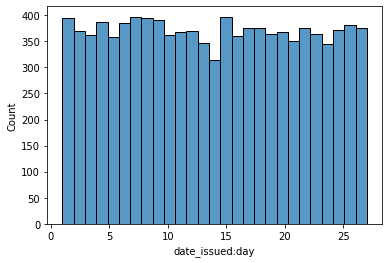

In [61]:
sns.histplot(df['date_issued:day'], kde=False, 
             bins=len(df['date_issued:day'].unique()))

''

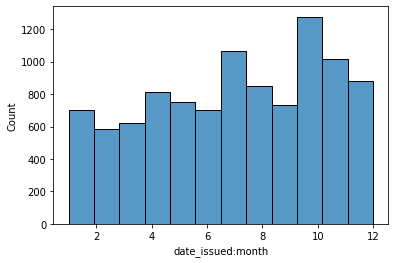

In [64]:
sns.histplot(df['date_issued:month'], kde=False, 
             bins=len(df['date_issued:month'].unique()))
;

<AxesSubplot:xlabel='date_issued:year', ylabel='Count'>

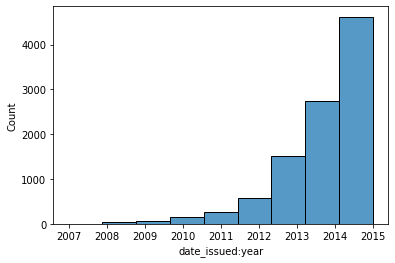

In [65]:
sns.histplot(df['date_issued:year'], kde=False, 
             bins=len(df['date_issued:year'].unique()))

<AxesSubplot:xlabel='date_issued:day_of_week', ylabel='Count'>

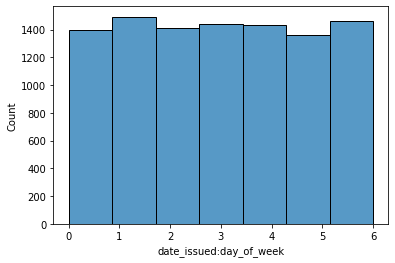

In [60]:
# date_issued:day_of_week
sns.histplot(df['date_issued:day_of_week'], kde=False, 
             bins=len(df['date_issued:day_of_week'].unique()))

## 2 source

<AxesSubplot:>

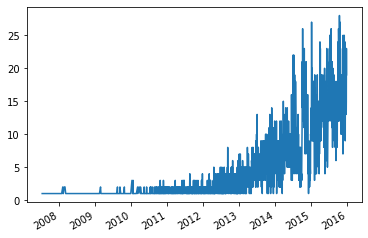

In [66]:
df['date_issued'].value_counts().sort_values().plot.line()

<AxesSubplot:>

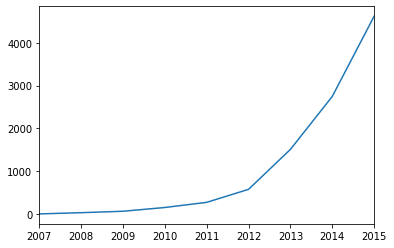

In [67]:
df['date_issued'].value_counts().resample('Y').sum().plot.line()

# Testando fast-ml

In [72]:
from fast_ml import eda
from fast_ml.utilities import reduce_memory_usage, display_all

# reduces the memory usage of the dataset by optimizing for the datatype used for storing the data
df3 = pd.read_csv("./datasets/loan.csv")
df3 = reduce_memory_usage(df3, convert_to_category=False)

In [73]:

summary_df = eda.df_info(df3)
display_all(summary_df)

,data_type,data_type_grp,num_unique_values,sample_unique_values,num_missing,perc_missing
customer_id,int16,Numerical,10000,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]",0,0.0
disbursed_amount,float16,Numerical,1891,"[23200.0, 7424.0, 11152.0, 7600.0, 31968.0, 82...",0,0.0
interest,float16,Numerical,1283,"[15.484375, 11.203125, 8.5078125, 5.8671875, 1...",0,0.0
market,object,Categorical,5,"[C, B, A, E, D]",0,0.0
employment,object,Categorical,11,"[Teacher, Accountant, Statistician, Other, Bus...",611,6.11
time_employed,object,Categorical,2,"[<=5 years, >5 years, nan]",529,5.29
householder,object,Categorical,3,"[RENT, OWNER, MORTGAGE]",0,0.0
income,float32,Numerical,2891,"[84600.0, 102000.0, 69840.0, 100386.0, 95040.0...",0,0.0
date_issued,object,Categorical,1642,"[2013-06-11, 2014-05-08, 2013-10-26, 2015-08-2...",0,0.0
target,int8,Numerical,2,"[0, 1]",0,0.0
